
CART法/分岐は2つに分かれるのみ

（最大の）深さ : 深さ1の実装

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy

from sklearn.model_selection import train_test_split

## 【問題1】 不純度を求める関数
## 【問題２】情報利得を求める関数
## 【問題３】学習
## 【問題4】推定

$
 I G ( p ) = I ( p ) − \frac{N l e f t , a l l}{N p , a l l}  I ( l e f t ) − \frac{N right , a l l}{N p , a l l}, I ( r i g h t ) 
$

In [243]:
x = np.array([
    [-0.44699 , -2.8073  ],[-1.4621  , -2.4586  ],
    [ 0.10645 ,  1.9242  ],[-3.5944  , -4.0112  ],
    [-0.9888  ,  4.5718  ],[-3.1625  , -3.9606  ],
    [ 0.56421 ,  0.72888 ],[-0.60216 ,  8.4636  ],
    [-0.61251 , -0.75345 ],[-0.73535 , -2.2718  ],
    [-0.80647 , -2.2135  ],[ 0.86291 ,  2.3946  ],
    [-3.1108  ,  0.15394 ],[-2.9362  ,  2.5462  ],
    [-0.57242 , -2.9915  ],[ 1.4771  ,  3.4896  ],
    [ 0.58619 ,  0.37158 ],[ 0.6017  ,  4.3439  ],
    [-2.1086  ,  8.3428  ],[-4.1013  , -4.353   ],
    [-1.9948  , -1.3927  ],[ 0.35084 , -0.031994],
    [ 0.96765 ,  7.8929  ],[-1.281   , 15.6824  ],
    [ 0.96765 , 10.083   ],[ 1.3763  ,  1.3347  ],
    [-2.234   , -2.5323  ],[-2.9452  , -1.8219  ],
    [ 0.14654 , -0.28733 ],[ 0.5461  ,  5.8245  ],
    [-0.65259 ,  9.3444  ],[ 0.59912 ,  5.3524  ],
    [ 0.50214 , -0.31818 ],[-3.0603  , -3.6461  ],
    [-6.6797  ,  0.67661 ],[-2.353   , -0.72261 ],
    [ 1.1319  ,  2.4023  ],[-0.12243 ,  9.0162  ],
    [-2.5677  , 13.1779  ],[ 0.057313,  5.4681  ],
])


# 合計
# ６４回


y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

# print(x)
# print(y.shape)

df = pd.DataFrame(x, y)
# display(df)

# 利用データ
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=42)
# print(x_train)
# print('x_train.shape')
# print(x_train.shape)
# print(x_test)
# print('x_test.shape')
# print(x_test.shape)
# print(y_train)
# print(y_train.shape)
# print(y_test)
# print(y_test.shape)

# print(scipy.stats.mode(y))

In [240]:
class ScratchDecesionTreeClassifierDepth1():
    """
    深さ1の決定木分類器のスクラッチ実装
    Parameters
    ----------
    verbose : bool
      学習過程を出力する場合はTrue
    """
    def __init__(self, verbose=False):
        # ハイパーパラメータを属性として記録
        self.verbose = verbose
        self.threshold_list = np.array([]) #閾値の初期化

    # 問題３
    def fit(self, x, y):
        """
        決定木分類器を学習する
        Parameters
        ----------
        x : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        """

        self.y_value = np.unique(y) #ターゲット変数の中身を抽出（二値分類なので０か１）

        # 分割回数は１回
        # グラフを生成する
        # 特徴量１...[:, 0], 特徴量2...[:, 1] left=0  right=1 として特徴量の列をそれぞれに入れていく処理を繰り返す
        # x_trainの合計数３２を０か１に割り振りをする。
        # 最適の分割を探す

        best_gini_index = 0.0 # 不純度初期化
        best_feature = None
        best_threshold = None

        # 説明変数の行と列数
        self.num_x = x.shape[0]
        n_features = x.shape[1]

        for n in range(n_features):
            # 分割候補の計算
            x_n = np.unique(x[:, n]) # n番目の列の特徴量（重複排除）
            points = (x_n[:-1] + x_n[1:]) / 2.0 # 隣の値との中間値を計算
            # pointにはx_trainと同じshape数（重複値は排除）

            # 各分割を試す（中間の値を閾値とする）
            for threshold in points:
                # しきい値で2グループに分割
                # yデータ中の、xのn列の特徴量のインデックスが閾値より大きいか
                y_data_left = y[x[:, n] <  threshold]#閾値より小さい　leftへ
                y_data_right = y[x[:, n] >= threshold]#閾値より大きい　rightへ

                # 分割後の不純度からGiniインデックスを計算
                gini_left = self._gini_impure(y_data_left)#閾値より小さいデータの不純度
                gini_right = self._gini_impure(y_data_right)#閾値より大きいデータの不純度

                # print(float(y_data_left.shape[0]))
                pl = float(y_data_left.shape[0]) / self.num_x
                pr = float(y_data_right.shape[0]) / self.num_x

                # 根ノードの不純度から
                # gini_index = y_gini - (pl * gini_left - pr * gini_right)
                gini_index = self._information_gain(y, gini_left, gini_right, pl, pr)#情報利得

                #一番利得の大きい番号の【データ中身・インデックス・閾値】を更新していく
                # 要するに、最後に残ったものがベスト
                if gini_index > best_gini_index:
                    best_gini_index = gini_index#良い分割のデータ中身を保存
                    best_feature = n#そのデータのインデックス
                    best_threshold = threshold#その時の閾値

            if best_gini_index == 0:
              return

        # 最良の分割を保持する
        self.gini_index = best_gini_index
        self.feature = best_feature
        self.threshold = best_threshold

        if self.verbose:
            #verboseをTrueにした際は学習過程を出力
            print()
    # 問題４
    def predict(self, x):
        """
        決定木分類器を使いラベルを推定する
        """
        self.gini_index#良い分割のデータ中身を保存 #0.9838709677419355
        self.feature#そのデータのインデックス #0
        self.threshold#その時の閾値 #-5.3905

        print(self.gini_index);print(self.feature);print(self.threshold) 

        #np.where(x < self.threshold) 条件１
        predict = np.zeros(len(x))

        for i in range(x.shape[0]):
          if x[x[:, self.feature] < self.threshold]:
            predict[i] = self.y_value[0]
          else:
            predict[i] = self.y_value[1]
        return predict

    # 問題１　ジニ不純度を求める関数　DIVERの式を違った形で表現（ノート参照）
    # def _gini_impure(self, x):
    #     # ジニ不純度を求める関数
    #     # 分子＝サンプルの値、　分母＝総サンプルの値
    #     gini = sum(x / sum(x) * (1 - x / sum(x)))
    #     # gini = np.append(gini, g)
    #     return gini
    ##↑↑↑↑↑↑最初に作ったジニ不純度を求める関数↑↑↑↑↑↑
    # 問題１
    def _gini_impure(self, y):
      # ジニ不純度を求める関数（DIVER問題1の式のまま）
        gini = 1
        for i in np.unique(y):
          gini = gini - (len(y[y == i]) / y.shape[0]) ** 2
        return gini
    # 問題２
    def _information_gain(self, y, left, right, pl, pr):
        # 情報利得を計算して返す関数
        base_gini = self._gini_impure(y) #根ノードのジニ不純度
        gain = base_gini - (pl * left - pr * right)
        return gain

# my_gain = x_gini - ((left / sum(x) * left_gini) - (right / sum(x) * right_gini))
# sam_gain = x_gini - ((left / sum(x) * left_gini) - (right / sum(x) * right_gini))
# 1.訓練データの全ての組み合わせの分割を行う（32×2）
# 2.分割したデータを繰り返し_information_gain(self, x, left, right)に通して、情報利得のreturnを変数に保存する
# 3.情報利得が一番大きい組み合わせを基準して保存する


# 問題５
myTREE = ScratchDecesionTreeClassifierDepth1()
myTREE.fit(x_train, y_train)
my_predict = myTREE.predict(x_test)
print(f'my_predict : {my_predict}')


0.9819178427419355
0
-5.13705
my_predict : [1. 1. 1. 1. 1. 1. 1. 1.]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:100: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.


## 問題５　学習と推定

In [238]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# スクラッチの結果
print(f'混同行列 : \n {confusion_matrix(y_test,my_predict)}')
print(f'正解率 : \n {accuracy_score(y_test,my_predict)}')
print(f'適合率 : \n {precision_score(y_test,my_predict)}')
print(f'再現率 : \n {recall_score(y_test,my_predict)}')
print(f'F1値  :  \n{f1_score(y_test,my_predict)}')

混同行列 : 
 [[0 5]
 [0 3]]
正解率 : 
 0.375
適合率 : 
 0.375
再現率 : 
 1.0
F1値  :  
0.5454545454545454


In [232]:
# モデル sklearn
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion='gini', max_depth=1)
clf = clf.fit(x_train, y_train)

sk_predict = clf.predict(x_test)

print(sk_predict)
print(sk_predict.shape)

[0 1 1 0 1 1 1 0]
(8,)


## 問題６ 可視化

0.9819178427419355
0
-5.13705


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:100: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: UserWarning: No contour levels were found within the data range.


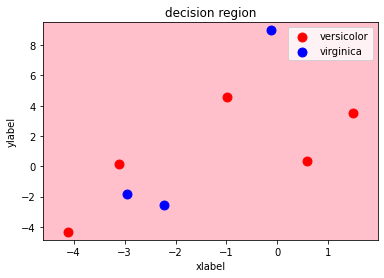

None


In [242]:
# 問題６　可視化

from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches


def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。
    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

print(decision_region(x_test, y_test, myTREE))


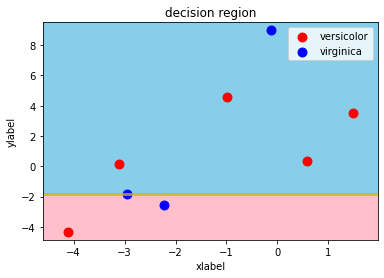

None


In [237]:
print(decision_region(x_test, y_test, clf))